# General Datasets


In [24]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
import numpy as np

In [25]:
X,Y = make_classification(n_classes=2, n_samples=400,n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

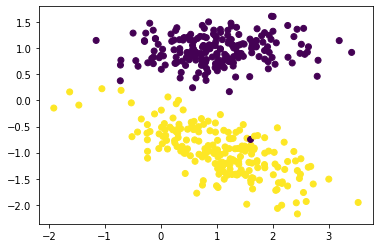

In [26]:
# covert y from {1,0} into {1,-1}
Y[Y==0] = -1#Broadcasting


plt.scatter(X[:,0],X[:,1],c=Y)

In [43]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss=0
        
        loss+= 0.5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss +=self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100, learning_rate=0.001,maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples= X.shape[0]
        
        n = learning_rate
        C = self.C
        
        #Init the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        #Training from here
        #weight and bias rule that we have discussed
        losses = []
        for i in range(300):
            #Training loop
            
            l = self.hingeLoss(W,bias,X,Y)
            
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            #Batch gradient descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                #Assume 0 gradient for the batch
                grad_w = 0
                grad_b = 0
                #Iterate over all example in the mini batch
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            grad_w +=0
                            grad_b +=0
                        else:
                            grad_w +=C*Y[i]*X[i]
                            grad_b +=C*Y[i]
                #Gradient for the batch is ready! Update W,B
                W = W - n*W +n*grad_w
                bias = bias + n*grad_b
                
        self.W = W
        self.B = bias 
        return W,bias,losses
                    

In [67]:
svm = SVM(20)


In [68]:
W,B,losses = svm.fit(X,Y)

In [69]:
losses[-1]

126.75750248947202

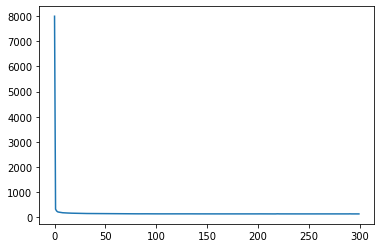

In [70]:
plt.plot(losses)
plt.show()

In [71]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(14,14))
    x_1 = np.linspace(-2,4,10)
    
    x_2 = -(w1*x_1+b)/w2
    plt.plot(x_1,x_2)
    
    x_2 = -(w1*x_1+b+1)/w2
    plt.plot(x_1,x_2)
    
    x_2 = -(w1*x_1+b-1)/w2
    plt.plot(x_1,x_2)
    
    plt.scatter(X[:,0],X[:,1], c=Y)
    plt.show()

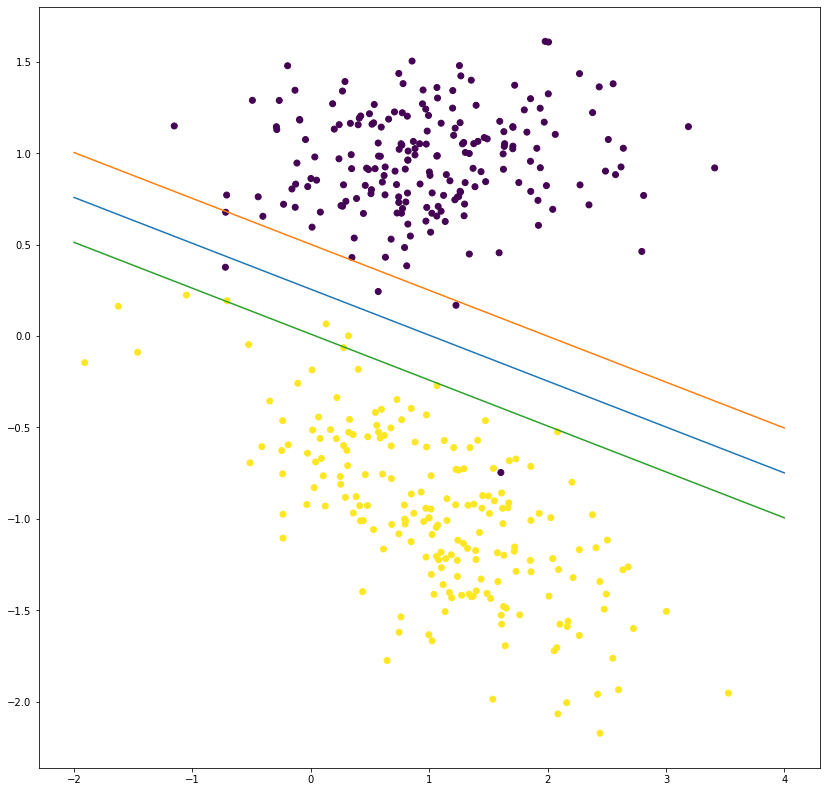

In [72]:
plotHyperplane(W[0,0],W[0,1],B)